<a href="https://colab.research.google.com/github/MohitPathak007/Puthon/blob/main/ProductRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files


uploaded = files.upload()


Saving files.csv to files.csv


In [6]:
import pandas as pd
import io
 
amazon_ratings = pd.read_csv(io.BytesIO(uploaded['files.csv']))
print(amazon_ratings)

                 UserId   ProductId  Rating   Timestamp
0        A39HTATAQ9V7YF  0205616461     5.0  1369699200
1        A3JM6GV9MNOF9X  0558925278     3.0  1355443200
2        A1Z513UWSAAO0F  0558925278     5.0  1404691200
3        A1WMRR494NWEWV  0733001998     4.0  1382572800
4        A3IAAVS479H7M7  0737104473     1.0  1274227200
...                 ...         ...     ...         ...
2023065  A3DEHKPFANB8VA  B00LORWRJA     5.0  1405296000
2023066  A3DEHKPFANB8VA  B00LOS7MEE     5.0  1405296000
2023067   AG9TJLJUN5OM3  B00LP2YB8E     5.0  1405382400
2023068   AYBIB14QOI9PC  B00LPVG6V0     5.0  1405555200
2023069  A1PB6OT0OOPKNQ  B00LU0LTOU     5.0  1405641600

[2023070 rows x 4 columns]


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [8]:
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [9]:
amazon_ratings.shape

(2023070, 4)

In [10]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


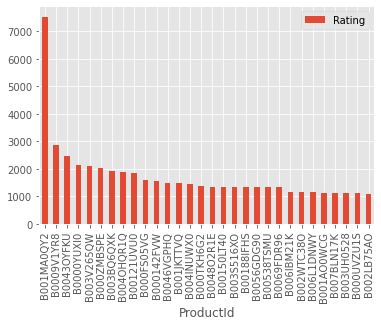

In [11]:
most_popular.head(30).plot(kind = "bar")

In [12]:
amazon_ratings1 = amazon_ratings.head(10000)

In [13]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
ratings_utility_matrix.shape

(9697, 886)

In [15]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X.shape

(886, 9697)

In [17]:
X1 = X

In [18]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [19]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [20]:
X.index[99]

'6117036094'

In [21]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [22]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [23]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['3292000971', '9571044822', '9790785410']

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [27]:
from google.colab import files


uploaded = files.upload()


Saving product_descriptions.csv to product_descriptions.csv


In [29]:
import pandas as pd
import io
 
product_descriptions = pd.read_csv(io.BytesIO(uploaded['product_descriptions.csv']))
print(product_descriptions)

        product_uid                                product_description
0            100001  Not only do angles make joints stronger, they ...
1            100002  BEHR Premium Textured DECKOVER is an innovativ...
2            100003  Classic architecture meets contemporary design...
3            100004  The Grape Solar 265-Watt Polycrystalline PV So...
4            100005  Update your bathroom with the Delta Vero Singl...
...             ...                                                ...
124423       224424  Create a neat yet stylish storage space for or...
124424       224425  Our Bullnose Adirondack Chair Cushions fit Adi...
124425       224426  Joist hangers are designed to provide support ...
124426       224427  These socket cap screws are ideal for applicat...
124427       224428  The Bosch quick change bi-metal hole saws feat...

[124428 rows x 2 columns]


In [32]:
product_descriptions.shape

(124428, 2)

In [33]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [34]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [35]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

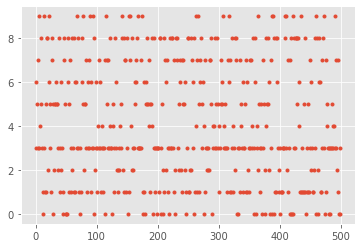

In [36]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [37]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [38]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 center
 cabinet
 screw
 pull
 vanity
 32
 hardware
 mounting
 nickel
 design
Cluster 1:
 plate
 helps
 steam
 insulation
 easy
 cycle
 ft
 watering
 speaker
 make
Cluster 2:
 storage
 wall
 shelves
 ft
 easy
 lbs
 space
 room
 tool
 home
Cluster 3:
 door
 easy
 oven
 proposition
 nbsp
 residents
 california
 wood
 65
 provides
Cluster 4:
 water
 handle
 toilet
 tank
 easy
 spray
 flush
 heater
 watering
 bowl
Cluster 5:
 tape
 tile
 surfaces
 paint
 recommended
 finish
 use
 piece
 installation
 multiple
Cluster 6:
 window
 cover
 aluminum
 frame
 concrete
 box
 basement
 shades
 stake
 windows
Cluster 7:
 metal
 roof
 ice
 roofing
 water
 use
 seal
 air
 snow
 radiant
Cluster 8:
 light
 watt
 power
 volt
 ft
 led
 fan
 air
 cooling
 kit
Cluster 9:
 post
 outdoor
 steel
 wood
 ft
 resistant
 patio
 fence
 deck
 frame


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [40]:
show_recommendations("cutting tool")

Cluster 2:
 storage
 wall
 shelves
 ft
 easy
 lbs
 space
 room
 tool
 home


In [41]:
show_recommendations("spray paint")

Cluster 4:
 water
 handle
 toilet
 tank
 easy
 spray
 flush
 heater
 watering
 bowl


In [42]:
show_recommendations("steel drill")

Cluster 9:
 post
 outdoor
 steel
 wood
 ft
 resistant
 patio
 fence
 deck
 frame


In [43]:
show_recommendations("water")

Cluster 4:
 water
 handle
 toilet
 tank
 easy
 spray
 flush
 heater
 watering
 bowl
